In [1]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path_to_xlsx = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_all_ck_ucks.xlsx'

In [3]:
all_elements_with_uck = pd.read_excel(path_to_xlsx)

In [4]:
nested_spheres_images = all_elements_with_uck[all_elements_with_uck['uck'] == 'Structure of the cosmos']

In [5]:
#step 2: open the df of all elements with full data, for a df of nested spheres and their data
path_to_xlsx1 = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_with_part_type.xlsx'

In [6]:
all_elements_full_info = pd.read_excel(path_to_xlsx1)

In [7]:
all_elements_full_info_unique = all_elements_full_info.drop_duplicates(subset=['images'])

In [8]:
# Merge the DataFrames on imaage IDs
nested_spheres_images_with_data = pd.merge(nested_spheres_images, all_elements_full_info, on='images', how='left')

C:\Users\nogas\AppData\Local\Temp\ipykernel_13480\3897321421.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['part_type', 'interval'])['images']


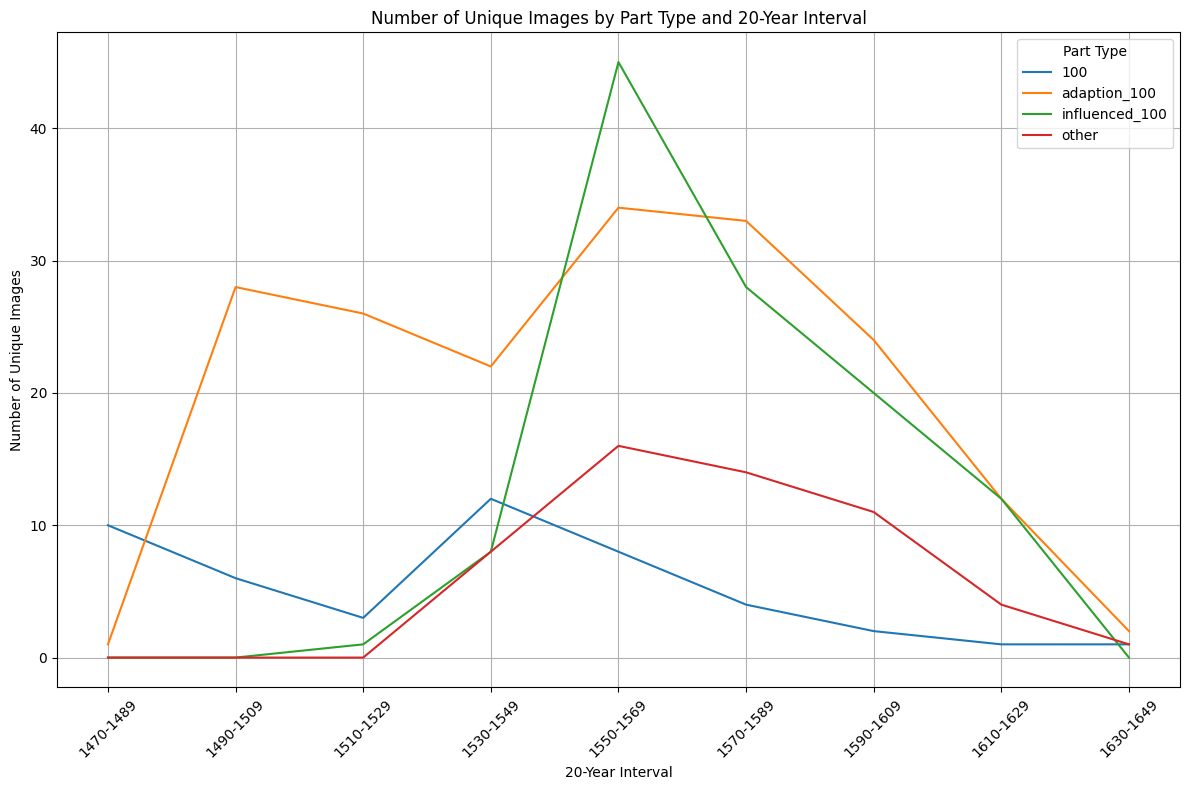

In [10]:
# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for intervals
nested_spheres_images_with_data['interval'] = pd.cut(nested_spheres_images_with_data['year'], bins=bins, labels=labels, right=False)

# Group by 'part_type' and 'interval', then count unique 'images'
unique_images_count = (nested_spheres_images_with_data
                       .groupby(['part_type', 'interval'])['images']
                       .nunique()
                       .reset_index())

# Rename columns for clarity
unique_images_count.columns = ['part_type', 'interval', 'unique_images_count']

# Pivot the DataFrame to have 'interval' as columns and 'part_type' as rows
pivot_df = unique_images_count.pivot(index='interval', columns='part_type', values='unique_images_count')

# Plot the data
plt.figure(figsize=(12, 8))

# Plot each part_type as a separate line
for part_type in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[part_type], label=part_type)

# Add titles and labels
plt.title('Number of Unique Images by Part Type and 20-Year Interval')
plt.xlabel('20-Year Interval')
plt.ylabel('Number of Unique Images')
plt.xticks(rotation=45)
plt.legend(title='Part Type')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [88]:
# List of specific keywords to count
specific_keywords = [
    'CK_07 Spheres',
    'CK_08 Spheres',
    'CK_09 Spheres',
    'CK_10 Spheres',
    'CK_11 Spheres',
    'CK_12 Spheres'
]

# Step 1: Filter rows containing any of the specific keywords
filtered_df = nested_spheres_images_with_data[nested_spheres_images_with_data['keywords'].apply(lambda x: any(keyword in x for keyword in specific_keywords))]

# Step 2: Count unique occurrences based on filtered rows
keyword_counts = {keyword: 0 for keyword in specific_keywords}

for index, row in filtered_df.iterrows():
    keywords_list = row['keywords'].split(';')
    for keyword in specific_keywords:
        if keyword in keywords_list:
            keyword_counts[keyword] += 1

# Step 3: Create a DataFrame from the counts
counts_df = pd.DataFrame(list(keyword_counts.items()), columns=['keywords', 'image_count'])

# Step 4: Display or further process the result
print(counts_df)

        keywords  image_count
0  CK_07 Spheres            3
1  CK_08 Spheres           20
2  CK_09 Spheres           88
3  CK_10 Spheres          232
4  CK_11 Spheres           37
5  CK_12 Spheres           22


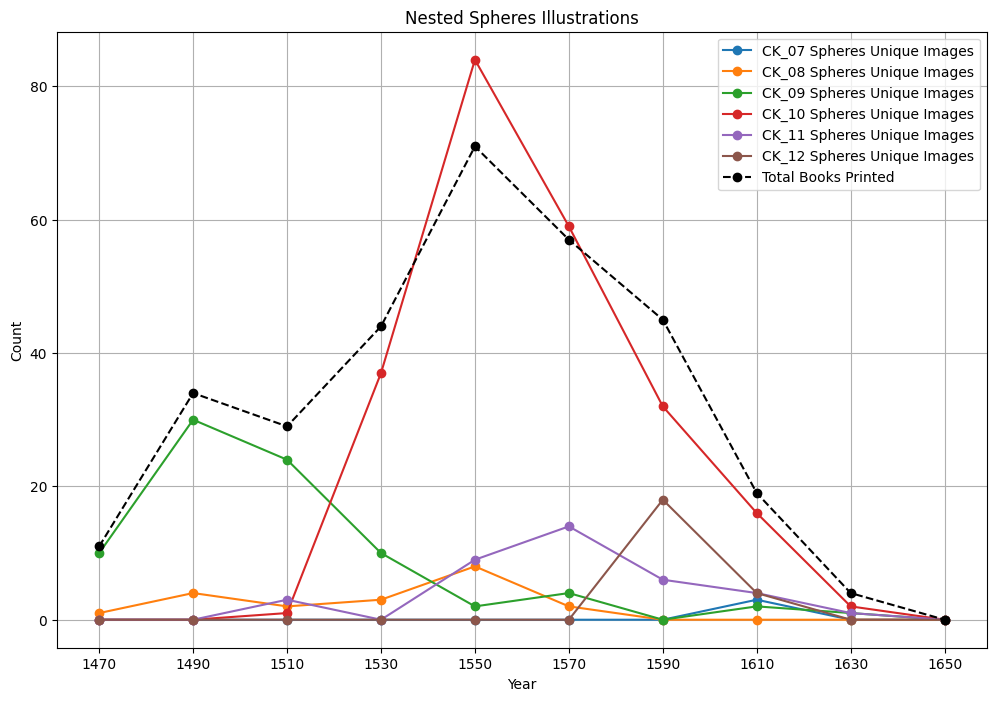

In [89]:
# Assuming nested_spheres_images_with_data is your actual DataFrame

# Step 1: Filter data by keywords and aggregate by twenty-year intervals
# List of specific keywords to plot
specific_keywords = [
    'CK_07 Spheres',
    'CK_08 Spheres',
    'CK_09 Spheres',
    'CK_10 Spheres',
    'CK_11 Spheres',
    'CK_12 Spheres'
]

# Filter data by keywords
filtered_data = nested_spheres_images_with_data[nested_spheres_images_with_data['keywords'].apply(lambda x: any(keyword in x for keyword in specific_keywords))]

# Convert year to integer (assuming it's not already)
filtered_data['year'] = filtered_data['year'].astype(int)

# Define year intervals (1470-1650) with 20-year steps
year_intervals = range(1470, 1651, 20)

# Create a new DataFrame to store counts per keyword and interval
data_for_plot = pd.DataFrame(index=year_intervals, columns=specific_keywords)

# Create lists to store total unique books and images per interval
total_unique_books = []
total_unique_images = []

# Iterate over keywords to count unique images and unique books in each interval
for start_year in year_intervals:
    end_year = start_year + 20
    # Filter data for the current interval
    interval_data = filtered_data[filtered_data['year'].between(start_year, end_year - 1)]
    # Count total unique books and images
    total_unique_books.append(interval_data['book'].nunique())
    total_unique_images.append(interval_data['images'].nunique())
    # Iterate over keywords to count unique images in each interval for each keyword
    for keyword in specific_keywords:
        filtered_subset = interval_data[interval_data['keywords'].str.contains(keyword)]
        unique_images_count = filtered_subset['images'].nunique()
        data_for_plot.loc[start_year, keyword] = unique_images_count

# Step 2: Plotting
plt.figure(figsize=(12, 8))

# Plotting unique images per keyword as lines
for keyword in specific_keywords:
    plt.plot(year_intervals, data_for_plot[keyword], marker='o', label=f'{keyword} Unique Images')

# Plotting total unique books as a line
plt.plot(year_intervals, total_unique_books, marker='o', linestyle='--', color='black', label='Total Books Printed')

# Customizing the plot
plt.title('Nested Spheres Illustrations')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(year_intervals)
plt.grid(True)
plt.legend()

# Show plot
plt.show()


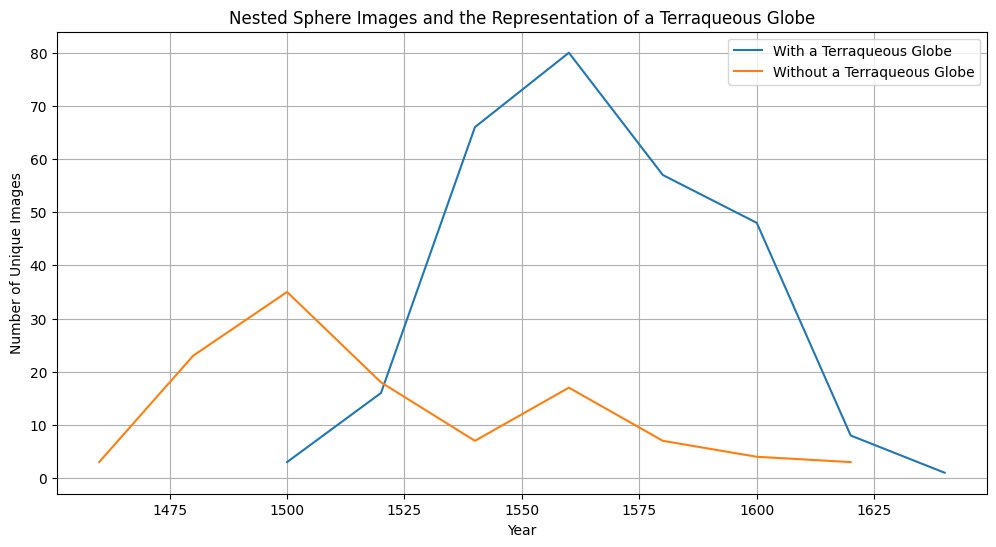

In [90]:
# Assuming your DataFrame is named nested_spheres_images_with_data
# Ensure the 'keywords' column contains lists of keywords separated by ';'
nested_spheres_images_with_data['keywords'] = nested_spheres_images_with_data['keywords'].apply(lambda x: x.split(';') if isinstance(x, str) else x)

# Explode the 'keywords' column to have one keyword per row
exploded_df = nested_spheres_images_with_data.explode('keywords')

# Filter for rows where 'CK_Terraqueous Globe' is in the 'keywords' column
with_keyword = exploded_df[exploded_df['keywords'] == 'CK_Terraqueous Globe']

# Get unique images for the 'with_keyword' DataFrame
unique_images_with_keyword = with_keyword.drop_duplicates(subset='images')

# Get unique images for the 'without_keyword' DataFrame
unique_images_without_keyword = nested_spheres_images_with_data[~nested_spheres_images_with_data['images'].isin(unique_images_with_keyword['images'])]

# Define a function to create 20-year intervals
def get_interval(year):
    return 20 * (year // 20)

# Add a column for the intervals in each DataFrame using .loc and explicitly cast the result
unique_images_with_keyword = unique_images_with_keyword.copy()
unique_images_without_keyword = unique_images_without_keyword.copy()

unique_images_with_keyword['interval'] = unique_images_with_keyword['year'].apply(get_interval).astype('int64')
unique_images_without_keyword['interval'] = unique_images_without_keyword['year'].apply(get_interval).astype('int64')

# Group by intervals and count unique images
with_keyword_counts = unique_images_with_keyword.groupby('interval')['images'].nunique().reset_index(name='count')
without_keyword_counts = unique_images_without_keyword.groupby('interval')['images'].nunique().reset_index(name='count')

# Plotting the counts
plt.figure(figsize=(12, 6))

plt.plot(with_keyword_counts['interval'], with_keyword_counts['count'], label='With a Terraqueous Globe')
plt.plot(without_keyword_counts['interval'], without_keyword_counts['count'], label='Without a Terraqueous Globe')

plt.xlabel('Year')
plt.ylabel('Number of Unique Images')
plt.title('Nested Sphere Images and the Representation of a Terraqueous Globe')
plt.legend()
plt.grid(True)
plt.show()


In [91]:
nested_spheres_images_with_data

,Unnamed: 0_x,images,label,uck,level,Unnamed: 0_y,keywords,cluster_name,authors,publishers,printers,place,year,bid,book,part_or_adaption,part_or_adaption_label,pagenum,bb,part_type
0,161294,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01225,Structure of the cosmos,1,4231,"[SK_1.2 Sphere Divided, CK_09 Spheres, MVK_Pic...",SIL_01225,"Sacrobosco, Johannes de",Company Heirs of Heinrich Quentell,Company Heirs of Heinrich Quentell,Cologne,1505,1795,http://sphaera.mpiwg-berlin.mpg.de/id/item/6b0...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,11,"xywh=294,212,587,562",adaption_100
1,161295,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01225,Structure of the cosmos,1,299,"[SK_1.2 Sphere Divided, CK_09 Spheres, MVK_Pic...",SIL_01225,"Sacrobosco, Johannes de",Company Heirs of Heinrich Quentell,Company Heirs of Heinrich Quentell,Cologne,1508,1642,http://sphaera.mpiwg-berlin.mpg.de/id/item/0d5...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,6,"xywh=591,446,1114,1154",adaption_100
2,161296,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01225,Structure of the cosmos,1,359,"[SK_1.2 Sphere Divided, CK_09 Spheres, MVK_Pic...",SIL_01225,"Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1510,1648,http://sphaera.mpiwg-berlin.mpg.de/id/item/f8d...,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,8,"xywh=151,393,839,836",100
3,161297,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01225,Structure of the cosmos,1,245,"[SK_1.2 Sphere Divided, CK_09 Spheres, MVK_Pic...",SIL_01225,"Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1498,1638,http://sphaera.mpiwg-berlin.mpg.de/id/item/52f...,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,7,"xywh=251,845,1048,1081",100
4,161298,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01225,Structure of the cosmos,1,8067,"[SK_1.2 Sphere Divided, CK_09 Spheres, MVK_Pic...",SIL_01225,"Faber, Wenzel;Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1520,1846,http://sphaera.mpiwg-berlin.mpg.de/id/item/2d3...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,16,"xywh=97,459,517,510",adaption_100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,191650,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_03732,Structure of the cosmos,1,4539,"[MVK_Pictorial_Diagrams, SK_1.2 Sphere Divided...",SIL_03732,"d'Ailly, Pierre","Petit I., Jean","Petit I., Jean",Paris,1508,1805,http://sphaera.mpiwg-berlin.mpg.de/id/item/3cc...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,28,"xywh=548,218,778,788",adaption_100
398,191651,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_03732,Structure of the cosmos,1,7434,"[MVK_Pictorial_Diagrams, SK_1.2 Sphere Divided...",SIL_03732,"Sacrobosco, Johannes de;d'Ailly, Pierre;Ciruel...","Petit I., Jean","Petit I., Jean",Paris,1515,1824,http://sphaera.mpiwg-berlin.mpg.de/id/item/e27...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,26,"xywh=580,212,763,773",adaption_100
399,191651,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_03732,Structure of the cosmos,1,7435,"[MVK_Pictorial_Diagrams, SK_1.2 Sphere Divided...",SIL_03732,"Sacrobosco, Johannes de;d'Ailly, Pierre;Ciruel...","Petit I., Jean","Petit I., Jean",Paris,1515,1824,http://sphaera.mpiwg-berlin.mpg.de/id/item/e27...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,26,"xywh=580,212,763,773",adaption_100
400,191652,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_03733,Structure of the cosmos,1,517,"[CK_T-O Maps, MVK_Pictorial_Diagrams, MTK_09 S...",SIL_03733,"Sacrobosco, Johannes de","Chaudière, Regnault","Quignon, Vincent",Paris,1516,1656,http://sphaera.mpiwg-berlin.mpg.de/id/item/4ee...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,9,"xywh=71,552,614,599",adaption_100


In [92]:
# Filter the DataFrame for part_type equal to 100
part_type_100_df = nested_spheres_images_with_data[nested_spheres_images_with_data['part_type'] == '100']


In [98]:
# Define the mapping from keywords to numbers
keyword_to_spheres = {
    'CK_07 Spheres': 7,
    'CK_08 Spheres': 8,
    'CK_09 Spheres': 9,
    'CK_10 Spheres': 10,
    'CK_11 Spheres': 11,
    'CK_12 Spheres': 12
}

# Apply the mapping
def get_number_of_spheres(keywords):
    for keyword in keyword_to_spheres:
        if keyword in keywords:
            return keyword_to_spheres[keyword]
    return None  # Return None if no matching keyword is found

# Ensure part_type_100_df is a copy to avoid setting with copy warning
part_type_100_df = part_type_100_df.copy()

# Apply the function and use .loc to avoid SettingWithCopyWarning
part_type_100_df.loc[:, 'number_of_spheres'] = part_type_100_df['keywords'].apply(get_number_of_spheres)


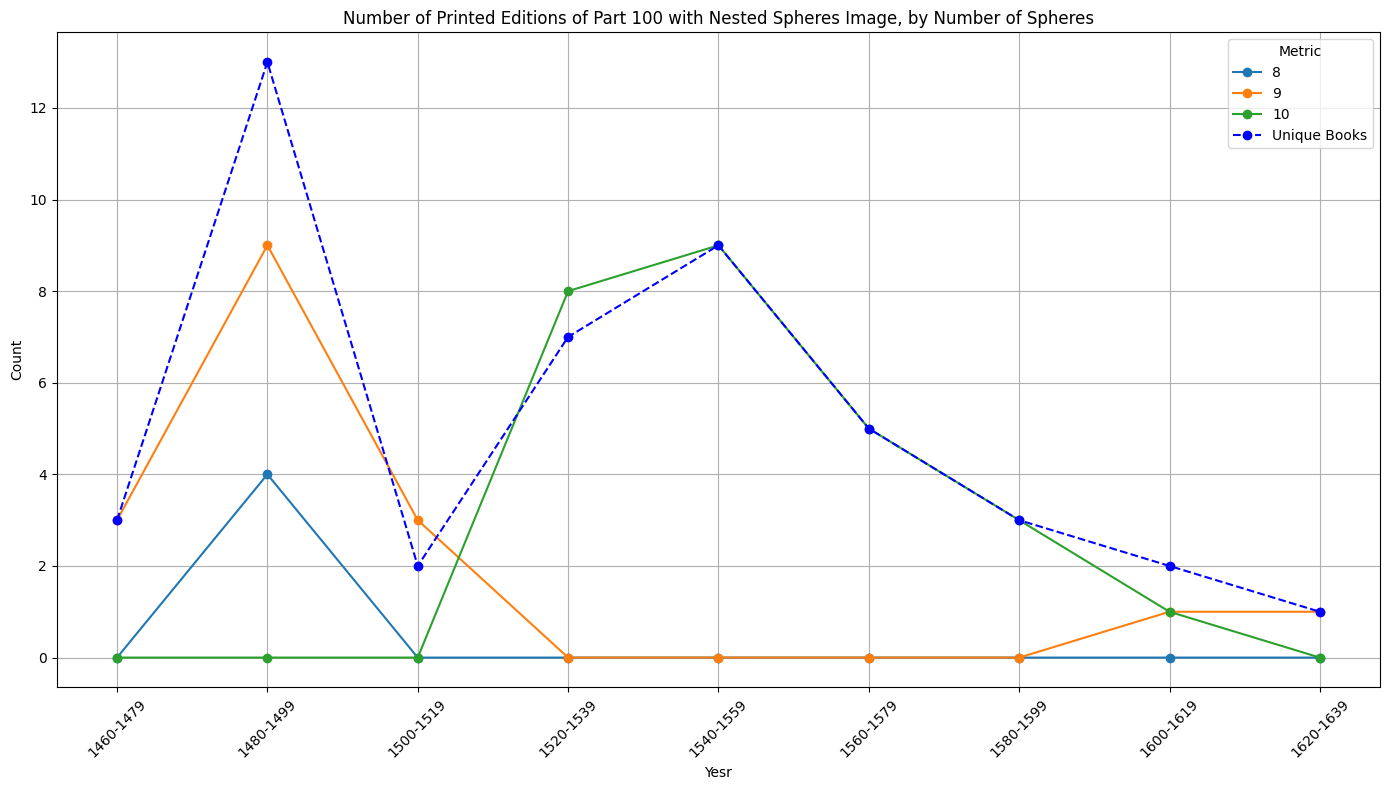

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Define function to create 20-year intervals
def create_intervals(year):
    return f"{(year // 20 * 20)}-{(year // 20 * 20 + 19)}"

# Apply the interval function to create intervals
part_type_100_df['interval'] = part_type_100_df['year'].apply(create_intervals)

# Group by interval and number_of_spheres, then count unique images
interval_spheres_grouped = (part_type_100_df
                            .groupby(['interval', 'number_of_spheres'])['images']
                            .nunique()
                            .unstack(fill_value=0))

# Group by interval to count unique books
interval_book_grouped = (part_type_100_df
                         .groupby(['interval'])
                         .agg(unique_books=('book', 'nunique'))
                         .reset_index())

# Plotting
plt.figure(figsize=(14, 8))

# Plot unique images by number of spheres
interval_spheres_grouped.plot(kind='line', marker='o', linestyle='-', ax=plt.gca())

# Plot unique books
plt.plot(interval_book_grouped['interval'], interval_book_grouped['unique_books'], marker='o', linestyle='--', color='b', label='Unique Books')

# Customize plot
plt.title('Number of Printed Editions of Part 100 with Nested Spheres Image, by Number of Spheres')
plt.xlabel('Yesr')
plt.ylabel('Count')
plt.legend(title='Metric')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [106]:
# Adaptions
part_type_100_adaption_df = nested_spheres_images_with_data[nested_spheres_images_with_data['part_type'] == 'adaption_100']

In [107]:
# Define the mapping from keywords to numbers
keyword_to_spheres = {
    'CK_07 Spheres': 7,
    'CK_08 Spheres': 8,
    'CK_09 Spheres': 9,
    'CK_10 Spheres': 10,
    'CK_11 Spheres': 11,
    'CK_12 Spheres': 12
}

# Apply the mapping
def get_number_of_spheres(keywords):
    for keyword in keyword_to_spheres:
        if keyword in keywords:
            return keyword_to_spheres[keyword]
    return None  # Return None if no matching keyword is found

# Ensure part_type_100_df is a copy to avoid setting with copy warning
part_type_100_adaption_df = part_type_100_adaption_df.copy()

# Apply the function and use .loc to avoid SettingWithCopyWarning
part_type_100_adaption_df.loc[:, 'number_of_spheres'] = part_type_100_adaption_df['keywords'].apply(get_number_of_spheres)


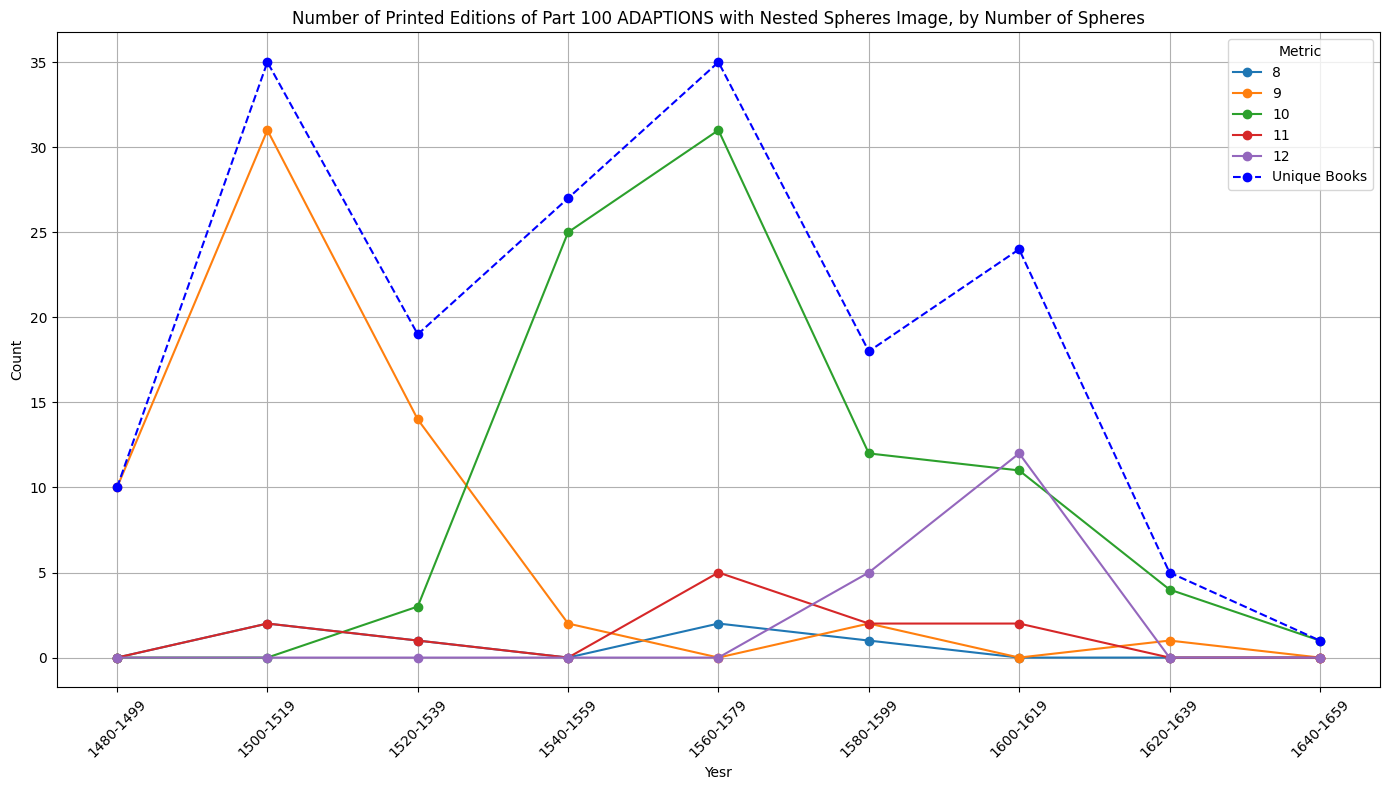

In [108]:
# Define function to create 20-year intervals
def create_intervals(year):
    return f"{(year // 20 * 20)}-{(year // 20 * 20 + 19)}"

# Apply the interval function to create intervals
part_type_100_adaption_df['interval'] = part_type_100_adaption_df['year'].apply(create_intervals)

# Group by interval and number_of_spheres, then count unique images
interval_spheres_grouped = (part_type_100_adaption_df
                            .groupby(['interval', 'number_of_spheres'])['images']
                            .nunique()
                            .unstack(fill_value=0))

# Group by interval to count unique books
interval_book_grouped = (part_type_100_adaption_df
                         .groupby(['interval'])
                         .agg(unique_books=('book', 'nunique'))
                         .reset_index())

# Plotting
plt.figure(figsize=(14, 8))

# Plot unique images by number of spheres
interval_spheres_grouped.plot(kind='line', marker='o', linestyle='-', ax=plt.gca())

# Plot unique books
plt.plot(interval_book_grouped['interval'], interval_book_grouped['unique_books'], marker='o', linestyle='--', color='b', label='Unique Books')

# Customize plot
plt.title('Number of Printed Editions of Part 100 ADAPTIONS with Nested Spheres Image, by Number of Spheres')
plt.xlabel('Yesr')
plt.ylabel('Count')
plt.legend(title='Metric')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [109]:
# influenced parts
part_type_100_influenced_df = nested_spheres_images_with_data[nested_spheres_images_with_data['part_type'] == 'influenced_100']

In [110]:
# Define the mapping from keywords to numbers
keyword_to_spheres = {
    'CK_07 Spheres': 7,
    'CK_08 Spheres': 8,
    'CK_09 Spheres': 9,
    'CK_10 Spheres': 10,
    'CK_11 Spheres': 11,
    'CK_12 Spheres': 12
}

# Apply the mapping
def get_number_of_spheres(keywords):
    for keyword in keyword_to_spheres:
        if keyword in keywords:
            return keyword_to_spheres[keyword]
    return None  # Return None if no matching keyword is found

# Ensure part_type_100_df is a copy to avoid setting with copy warning
part_type_100_influenced_df = part_type_100_influenced_df.copy()

# Apply the function and use .loc to avoid SettingWithCopyWarning
part_type_100_influenced_df.loc[:, 'number_of_spheres'] = part_type_100_influenced_df['keywords'].apply(get_number_of_spheres)


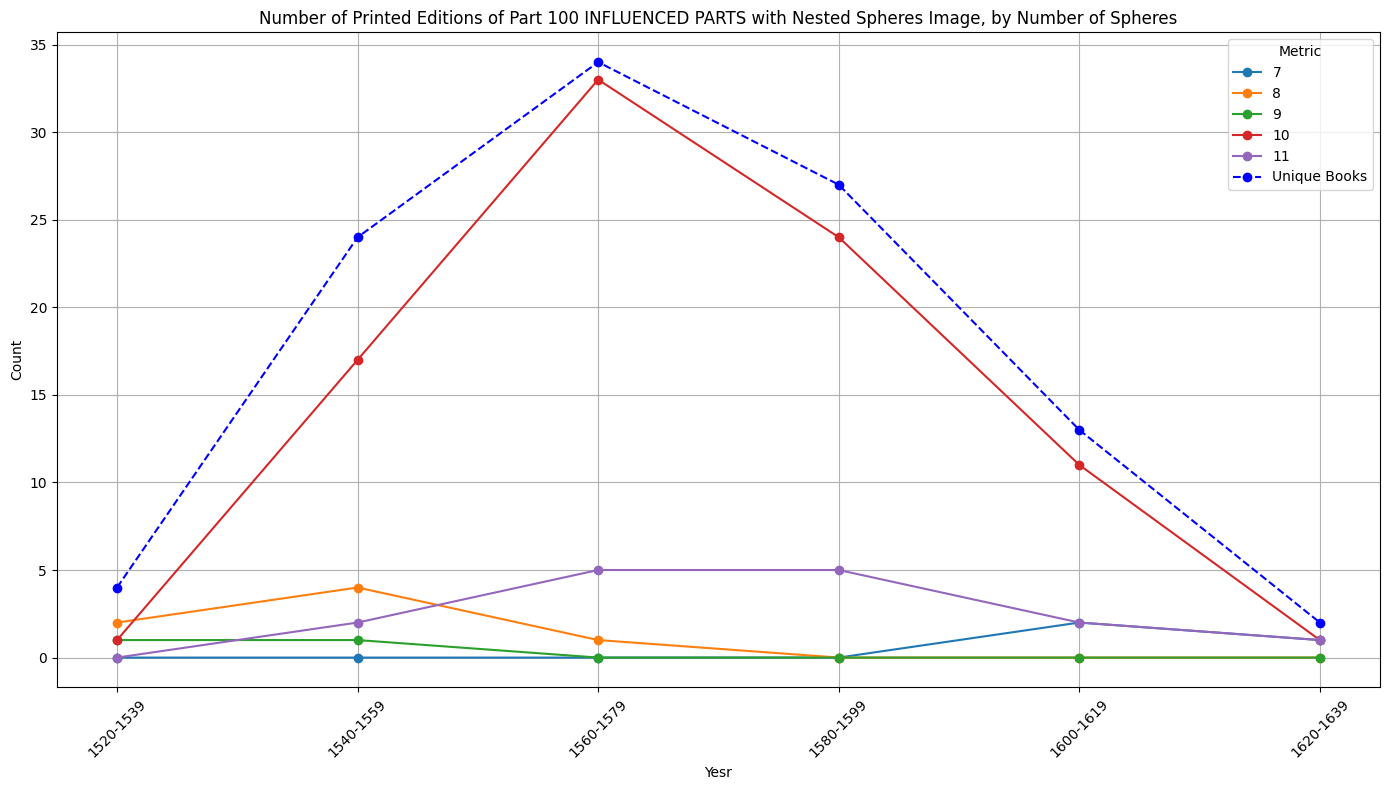

In [112]:
# Define function to create 20-year intervals
def create_intervals(year):
    return f"{(year // 20 * 20)}-{(year // 20 * 20 + 19)}"

# Apply the interval function to create intervals
part_type_100_influenced_df['interval'] = part_type_100_influenced_df['year'].apply(create_intervals)

# Group by interval and number_of_spheres, then count unique images
interval_spheres_grouped = (part_type_100_influenced_df
                            .groupby(['interval', 'number_of_spheres'])['images']
                            .nunique()
                            .unstack(fill_value=0))

# Group by interval to count unique books
interval_book_grouped = (part_type_100_influenced_df
                         .groupby(['interval'])
                         .agg(unique_books=('book', 'nunique'))
                         .reset_index())

# Plotting
plt.figure(figsize=(14, 8))

# Plot unique images by number of spheres
interval_spheres_grouped.plot(kind='line', marker='o', linestyle='-', ax=plt.gca())

# Plot unique books
plt.plot(interval_book_grouped['interval'], interval_book_grouped['unique_books'], marker='o', linestyle='--', color='b', label='Unique Books')

# Customize plot
plt.title('Number of Printed Editions of Part 100 INFLUENCED PARTS with Nested Spheres Image, by Number of Spheres')
plt.xlabel('Yesr')
plt.ylabel('Count')
plt.legend(title='Metric')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
